# National Weather Service (NWS) API in Python

by Michael T. Moen

Please see the following resources for more information on API usage:

- Documentation
    - <a href="https://www.weather.gov/documentation/services-web-api" target="_blank">NWS API Documentation</a>
    - <a href="https://weather-gov.github.io/api/general-faqs" target="_blank">NWS API General FAQs</a>
- Terms of Use
    - From the documentation, "All of the information presented via the API is intended to be open data, free to use for any purpose."

**_NOTE:_** The NWS API imposes a rate limit on requests, but the amount is not published. We recommend using a 1 second delay between API requests.

*These recipe examples were tested on March 20, 2025.*

```{warning}

Example use-cases and result outputs shown are for demonstration purposes only. The displayed results are for a specific example location and are **not** current. For live and up-to-date weather data, conditions, forecasts, and alerts in U.S. locations, visit the <a href="https://www.weather.gov/" target="_blank">National Weather Service website</a>.

```

## Setup

### Import Libraries

The following external libraries need to be installed into your enviornment to run the code examples in this tutorial:

- <a href="https://github.com/ipython/ipykernel" target="_blank">ipykernel</a>
- <a href="https://github.com/psf/requests" target="_blank">requests</a>
- <a href="https://github.com/theskumar/python-dotenv" target="_blank">python-dotenv</a>
- <a href="https://github.com/matplotlib/matplotlib" target="_blank">matplotlib</a>

We import the libraries used in this tutorial below:

In [1]:
import os
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from time import sleep
from dateutil import parser
from dotenv import load_dotenv

### Import User-Agent

An User Agent is required to access the NWS API.

We keep our User Agent in a `.env` file and use the `dotenv` library to access it. If you would like to use this method, create a file named `.env` in the same directory as this notebook and add the following line to it:

```text
NWS_USER_AGENT="Application Name, email@domain.com"
```

In [2]:
load_dotenv()
try:
    USER_AGENT = {"User-Agent": os.environ["NWS_USER_AGENT"]}
except KeyError:
    print("User-Agent key not found. Please set 'NWS_USER_AGENT' in your .env file.")

## 1. Get the 12-Hour Forecast for a Location

```{warning}

Example use-cases and result outputs shown are for demonstration purposes only. The displayed results are for a specific example location and are **not** current. For live and up-to-date weather data, conditions, forecasts, and alerts in U.S. locations, visit the <a href="https://www.weather.gov/" target="_blank">National Weather Service website</a>.

```

The NWS publishes weather forecasts for each of its Weather Forecast Offices. A map of these offices and the regions they cover can be found <a href="https://www.weather.gov/srh/nwsoffices" target="_blank">here</a>.

In order to obtain the forecast for a location, we must query that region's Weather Forecast Office using its code and the grid coordinates of the location. To determine these values for a location, we can query the `/points` endpoint.

*To see how to programmatically obtain the latititude and longitude of an address in the U.S., please see our <a href="https://ua-libraries-research-data-services.github.io/UALIB_ScholarlyAPI_Cookbook/src/overview/us-census-geocoding.html" target="_blank">U.S. Census Geocoding cookbook tutorials</a>.*

In [3]:
latitude = '33.211952'
longitude = '-87.545920'

url = f'https://api.weather.gov/points/{latitude},{longitude}'
response = requests.get(url, headers=USER_AGENT).json()

# Display response from API
response

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   's': 'https://schema.org/',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#',
   'geometry': {'@id': 's:GeoCoordinates', '@type': 'geo:wktLiteral'},
   'city': 's:addressLocality',
   'state': 's:addressRegion',
   'distance': {'@id': 's:Distance', '@type': 's:QuantitativeValue'},
   'bearing': {'@type': 's:QuantitativeValue'},
   'value': {'@id': 's:value'},
   'unitCode': {'@id': 's:unitCode', '@type': '@id'},
   'forecastOffice': {'@type': '@id'},
   'forecastGridData': {'@type': '@id'},
   'publicZone': {'@type': '@id'},
   'county': {'@type': '@id'}}],
 'id': 'https://api.weather.gov/points/33.212,-87.5459',
 'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [-87.5459, 33.212]},
 'properties': {'@id': 'https://api.weather.gov/poi

In [4]:
office = response["properties"]["gridId"]
gridX = response["properties"]["gridX"]
gridY = response["properties"]["gridY"]

# Print grid location data
print(f'Office code: {office}, Grid coordinates: {gridX}, {gridY}')

Office code: BMX, Grid coordinates: 33, 69


Now that we have obtained the grid coordinates and office code, we can use the `/gridpoints` endpoint to obtain the seven day forecast (*output data is for a specific location and is **not** current; visit the <a href="https://www.weather.gov/" target="_blank">National Weather Service website</a> for up-to-date information*).

In [5]:
url = f'https://api.weather.gov/gridpoints/{office}/{gridX},{gridY}/forecast'
response = requests.get(url, headers=USER_AGENT).json()

# Display first result
response["properties"]["periods"][0]

{'number': 1,
 'name': 'Today',
 'startTime': '2025-03-21T11:00:00-05:00',
 'endTime': '2025-03-21T18:00:00-05:00',
 'isDaytime': True,
 'temperature': 67,
 'temperatureUnit': 'F',
 'temperatureTrend': '',
 'probabilityOfPrecipitation': {'unitCode': 'wmoUnit:percent', 'value': None},
 'windSpeed': '0 to 10 mph',
 'windDirection': 'SW',
 'icon': 'https://api.weather.gov/icons/land/day/skc?size=medium',
 'shortForecast': 'Sunny',
 'detailedForecast': 'Sunny, with a high near 67. Southwest wind 0 to 10 mph.'}

Finally, we can print the data we are interested in. In this case, we're looking at the temperature, probability of precipitation, and detailed forecast (*output data is for a specific location and is **not** current; visit the <a href="https://www.weather.gov/" target="_blank">National Weather Service website</a> for up-to-date information.*).

In [6]:
for day in response["properties"]["periods"]:
    name = day["name"]
    temperature = day["temperature"]
    rain = day["probabilityOfPrecipitation"]["value"] or 0
    forecast = day["detailedForecast"]
    print(f'{name:<16}: {temperature:>3}F, {rain:>3}%, {forecast}')

Today           :  67F,   0%, Sunny, with a high near 67. Southwest wind 0 to 10 mph.
Tonight         :  41F,   0%, Mostly clear, with a low around 41. South wind around 5 mph.
Saturday        :  76F,   0%, Sunny, with a high near 76. West wind 5 to 10 mph.
Saturday Night  :  50F,   0%, Clear, with a low around 50. South wind 0 to 5 mph.
Sunday          :  79F,   0%, Sunny, with a high near 79. South wind 5 to 15 mph, with gusts as high as 30 mph.
Sunday Night    :  56F, 100%, Showers and thunderstorms after 7pm. Mostly cloudy, with a low around 56. Chance of precipitation is 100%.
Monday          :  72F, 100%, Showers and thunderstorms before 7am, then a slight chance of showers and thunderstorms between 7am and 1pm. Partly sunny, with a high near 72. Chance of precipitation is 100%.
Monday Night    :  46F,   0%, Partly cloudy, with a low around 46.
Tuesday         :  78F,   0%, Sunny, with a high near 78.
Tuesday Night   :  51F,   0%, Mostly clear, with a low around 51.
Wednesday    

## 2. Get the Hourly Forecast for a Location

```{warning}

Example use-cases and result outputs shown are for demonstration purposes only. The displayed results are for a specific example location and are **not** current. For live and up-to-date weather data, conditions, forecasts, and alerts in U.S. locations, visit the <a href="https://www.weather.gov/" target="_blank">National Weather Service website</a>.

```

The `/gridpoints` endpoint can also return an hourly forecast for a seven day period. The function below implements the code from the example above using this hourly forecast method:

In [7]:
# Note that this function only works with valid latitude and longitude inputs
def getHourlyForecast(latitude, longitude, user_agent):
    points_data = requests.get(
        f'https://api.weather.gov/points/{latitude},{longitude}',
        headers=user_agent
    ).json()
    office = points_data["properties"]["gridId"]
    gridX = points_data["properties"]["gridX"]
    gridY = points_data["properties"]["gridY"]

    sleep(1)    # Add 1 second delay between API requests

    # The "/hourly" is the only difference between the hourly and daily forecast URLs
    gridpoints_data = requests.get(
        f'https://api.weather.gov/gridpoints/{office}/{gridX},{gridY}/forecast/hourly',
        headers=user_agent
    ).json()
    return gridpoints_data["properties"]["periods"]

The function can be easily used as such:

In [8]:
latitude = '33.211952'
longitude = '-87.545920'
hourlyForecast = getHourlyForecast(latitude, longitude, USER_AGENT)
len(hourlyForecast)

156

Lastly, we can use matplotlib to graph the temperature data (*output data is for a specific location and is **not** current; visit the <a href="https://www.weather.gov/" target="_blank">National Weather Service website</a> for up-to-date information*).

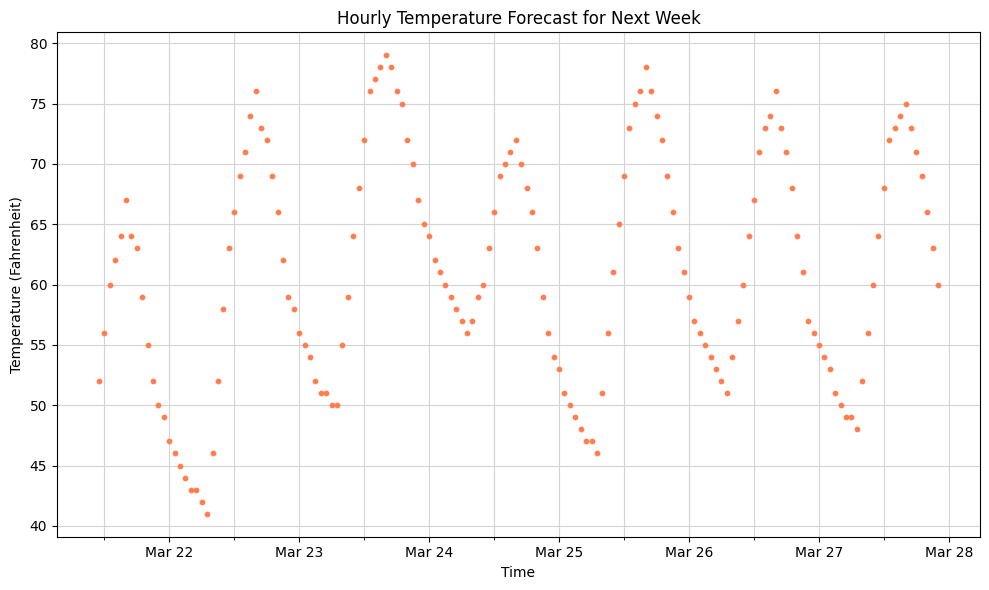

In [9]:
hours = []
temperatures = []
for hourForecast in hourlyForecast:
    hour = parser.parse(hourForecast["startTime"][:19])
    hours.append(hour)
    temperatures.append(hourForecast["temperature"])

plt.figure(figsize=(10, 6))
plt.scatter(hours, temperatures, color='coral', marker='o', s=10)
plt.title('Hourly Temperature Forecast for Next Week')
plt.xlabel('Time')
plt.ylabel('Temperature (Fahrenheit)')
plt.grid(True, which='both', color='lightgray')
plt.gca().set_axisbelow(True)
plt.gca().xaxis.set_major_locator(mdates.HourLocator(byhour=0))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.gca().xaxis.set_minor_locator(mdates.HourLocator(byhour=12))
plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter(''))
plt.tight_layout()
plt.show()

## 3. Get Alerts for a Location

```{warning}

Example use-cases and result outputs shown are for demonstration purposes only. The displayed results are for a specific example location and are **not** current. For live and up-to-date weather data, conditions, forecasts, and alerts in U.S. locations, visit the <a href="https://www.weather.gov/" target="_blank">National Weather Service website</a>.

```

The `/alerts` endpoint returns all alerts issued for a given location or area. The example below uses the `point` parameter to find all alerts for a pair of coordinates:

In [10]:
latitude = '33.211952'
longitude = '-87.545920'

url = f'https://api.weather.gov/alerts/active?point={latitude},{longitude}'
response = requests.get(url, headers=USER_AGENT).json()

# Display response from API
response

{'@context': {'@version': '1.1'},
 'type': 'FeatureCollection',
 'features': [],
 'title': 'Current watches, warnings, and advisories for 33.211952 N, 87.54592 W',
 'updated': '2025-03-21T14:00:00+00:00'}

Note that in the example above, there are no active alerts (*output data is for a specific location and is **not** current; visit the <a href="https://www.weather.gov/" target="_blank">National Weather Service website</a> for up-to-date information*).

The example below uses the `area` parameter to find alerts for the state of Alabama:

In [11]:
state = 'AL'

url = f'https://api.weather.gov/alerts/active?area={state}'
response = requests.get(url, headers=USER_AGENT).json()

# Display response from API
response['features'][0]

{'id': 'https://api.weather.gov/alerts/urn:oid:2.49.0.1.840.0.81bdc5cba392ccdc980a3772eaa6b40432383b93.001.1',
 'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-88.05, 32.31],
    [-87.91, 32.32],
    [-88.09, 31.78],
    [-88.04, 31.6],
    [-88.10000000000001, 31.6],
    [-88.22000000000001, 31.78],
    [-88.05, 32.31]]]},
 'properties': {'@id': 'https://api.weather.gov/alerts/urn:oid:2.49.0.1.840.0.81bdc5cba392ccdc980a3772eaa6b40432383b93.001.1',
  '@type': 'wx:Alert',
  'id': 'urn:oid:2.49.0.1.840.0.81bdc5cba392ccdc980a3772eaa6b40432383b93.001.1',
  'areaDesc': 'Choctaw, AL; Clarke, AL; Washington, AL',
  'geocode': {'SAME': ['001023', '001025', '001129'],
   'UGC': ['ALC023', 'ALC025', 'ALC129']},
  'affectedZones': ['https://api.weather.gov/zones/county/ALC023',
   'https://api.weather.gov/zones/county/ALC025',
   'https://api.weather.gov/zones/county/ALC129'],
  'references': [{'@id': 'https://api.weather.gov/alerts/urn:oid:2.49.0.1.840.0.9fc3b06a46c45e7f

In [12]:
for event in response['features']:
    print(event['properties']['headline'])

Flood Warning issued March 21 at 9:45AM CDT until March 22 at 12:08PM CDT by NWS Mobile AL
Flood Warning issued March 21 at 9:44AM CDT until March 22 at 11:00PM CDT by NWS Mobile AL


*Output data is for a specific location and is **not** current; visit the <a href="https://www.weather.gov/" target="_blank">National Weather Service website</a> for up-to-date information.*